<a href="https://colab.research.google.com/github/DeepakKumarSingh003/Rossmann-Sales-Prediction-/blob/main/Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

#Using Machine Learning to predict sales.
Without proper sales forecasting, many business decisions are based on unreliable estimates or instinct – which leads to many inefficiencies and missed opportunities. with forecating we can answer Questions like.
* How much stock should be ordered? 
* How much revenue can be expected in upcoming Year.? 

**What is sales forecasting?**

A sales forecast is an estimation of future sales. This estimation can be based on past values, economic indicators, seasonality, weather forecasts… etc.

#Import Important Libraries.

In [2]:
#Import numpy with alias np
import numpy as np
#Import pandas with alias pd
import pandas as pd
#Import seaborn with alias sns
import seaborn as sns
#Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')


#Data Import

In [3]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Data set csv Files location. 
File1="/content/drive/MyDrive/Alma better Projects/Supervised ML-Regression/Copy of Rossmann Stores Data.csv"
File2="/content/drive/MyDrive/Alma better Projects/Supervised ML-Regression/Copy of store.csv"

**Importing Data set.**

In [5]:
#Load Rossmann store Data set.
df0=pd.read_csv(File1)
#Load store Data set.
df1=pd.read_csv(File2,index_col="Store")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#Exploring Data sets.

In [6]:

print("(Rows, Columns)=",df0.shape)
df0.head(1116)

(Rows, Columns)= (1017209, 9)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1111,1112,5,2015-07-31,9626,767,1,1,0,1
1112,1113,5,2015-07-31,7289,720,1,1,0,1
1113,1114,5,2015-07-31,27508,3745,1,1,0,1
1114,1115,5,2015-07-31,8680,538,1,1,0,1


In [7]:
df0.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [8]:
df0.info()
print("\n")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1115 entries, 1 to 1115
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StoreType                  1115 non-null   object 
 1   Assortment                 1115 non-null   object 
 2   Compe

In [9]:
#Make a function for detail information.
def Detailed_info(DataFrame):
  '''This Function will give detailed information with clearity about the DataFrame it will provide:
      1.Columns name,2.Data type,3.Unique in Data frame,4.Total nulls,5.Not Nulls,6.Percentage of Nulls
  '''
  info = pd.DataFrame(index=DataFrame.columns)
  info['dtype'] = DataFrame.dtypes
  info['Unique'] = DataFrame.nunique()
  info['Num_ofNullValues'] = DataFrame.isnull().sum()
  info['Num_nonNullValues'] = DataFrame.count()
  info['percent_ofNullValues'] = info['Num_ofNullValues']/len(DataFrame) * 100
  return info
Detailed_info(df0)

,dtype,Unique,Num_ofNullValues,Num_nonNullValues,percent_ofNullValues
Store,int64,1115,0,1017209,0.0
DayOfWeek,int64,7,0,1017209,0.0
Date,object,942,0,1017209,0.0
Sales,int64,21734,0,1017209,0.0
Customers,int64,4086,0,1017209,0.0
Open,int64,2,0,1017209,0.0
Promo,int64,2,0,1017209,0.0
StateHoliday,object,5,0,1017209,0.0
SchoolHoliday,int64,2,0,1017209,0.0


In [10]:
x=[]
for i in df0:
  x.append(i)
   
  
for j in x:
  unq=df0[j].unique()
  print(j)
  print(unq)
  print("\n")  
    


Store
[   1    2    3 ... 1113 1114 1115]


DayOfWeek
[5 4 3 2 1 7 6]


Date
['2015-07-31' '2015-07-30' '2015-07-29' '2015-07-28' '2015-07-27'
 '2015-07-26' '2015-07-25' '2015-07-24' '2015-07-23' '2015-07-22'
 '2015-07-21' '2015-07-20' '2015-07-19' '2015-07-18' '2015-07-17'
 '2015-07-16' '2015-07-15' '2015-07-14' '2015-07-13' '2015-07-12'
 '2015-07-11' '2015-07-10' '2015-07-09' '2015-07-08' '2015-07-07'
 '2015-07-06' '2015-07-05' '2015-07-04' '2015-07-03' '2015-07-02'
 '2015-07-01' '2015-06-30' '2015-06-29' '2015-06-28' '2015-06-27'
 '2015-06-26' '2015-06-25' '2015-06-24' '2015-06-23' '2015-06-22'
 '2015-06-21' '2015-06-20' '2015-06-19' '2015-06-18' '2015-06-17'
 '2015-06-16' '2015-06-15' '2015-06-14' '2015-06-13' '2015-06-12'
 '2015-06-11' '2015-06-10' '2015-06-09' '2015-06-08' '2015-06-07'
 '2015-06-06' '2015-06-05' '2015-06-04' '2015-06-03' '2015-06-02'
 '2015-06-01' '2015-05-31' '2015-05-30' '2015-05-29' '2015-05-28'
 '2015-05-27' '2015-05-26' '2015-05-25' '2015-05-24' '2015-05-23'

#Feature Transformation
* Missing Value Imputation.
* Feature scaling.
* Outlier Detection

**1** **Rossman DataSet**

In [11]:
df0.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

**Date**

In [12]:
df0["Date"]=df0["Date"].apply(lambda x:pd.to_datetime(x))

In [13]:
df0['Week_Number'] = df0['Date'].dt.strftime('%U')

**StateHoliday**

In [14]:
print(df0["StateHoliday"].unique())


['0' 'a' 'b' 'c' 0]


*Convert string a,b,c which represent different holidays into 1 as it also represents a Holiday.*

In [15]:
df0["StateHoliday"] = df0['StateHoliday'].apply(lambda x: str(x).replace('a',"1") if 'a' in str(x) else x)
df0["StateHoliday"] = df0['StateHoliday'].apply(lambda x: str(x).replace('b',"1") if 'b' in str(x) else x)
df0["StateHoliday"] = df0['StateHoliday'].apply(lambda x: str(x).replace('c',"1") if 'c' in str(x) else x)

df0["StateHoliday"] = df0["StateHoliday"].apply(pd.to_numeric, errors='coerce')

In [16]:

df0["StateHoliday"].value_counts()

0    986159
1     31050
Name: StateHoliday, dtype: int64

**2** **Store Data Set**

In [17]:
print("(Rows, Columns)=",df1.shape)
df1.sample(5)



(Rows, Columns)= (1115, 9)


,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Store,,,,,,,,,
905,a,a,90.0,6.0,2014.0,0,NaN,NaN,NaN
660,a,a,1200.0,11.0,2006.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct"
1019,d,c,2740.0,7.0,2014.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
770,a,c,100.0,4.0,2015.0,0,NaN,NaN,NaN
885,a,a,480.0,12.0,2005.0,0,NaN,NaN,NaN


In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1115 entries, 1 to 1115
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StoreType                  1115 non-null   object 
 1   Assortment                 1115 non-null   object 
 2   CompetitionDistance        1112 non-null   float64
 3   CompetitionOpenSinceMonth  761 non-null    float64
 4   CompetitionOpenSinceYear   761 non-null    float64
 5   Promo2                     1115 non-null   int64  
 6   Promo2SinceWeek            571 non-null    float64
 7   Promo2SinceYear            571 non-null    float64
 8   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(1), object(3)
memory usage: 87.1+ KB


**Handling the Missing Value**

* Fill CompetitionDistance with max value.

* Fill CompetitionOpenSinceMonth & CompetitionOpenSinceYear with mode.
* Drope Promo2SinceWeek ,Promo2SinceYear , PromoInterval as  they have huge nulls in them.

In [19]:

df1.drop(['Promo2SinceWeek','Promo2SinceYear','PromoInterval'], axis='columns', inplace=True)
df1['CompetitionDistance'] = df1['CompetitionDistance'].fillna(df1['CompetitionDistance'].max())
df1['CompetitionOpenSinceMonth'] = df1['CompetitionOpenSinceMonth'].fillna(df1['CompetitionOpenSinceMonth'].mode().iloc[0])
df1['CompetitionOpenSinceYear'] = df1['CompetitionOpenSinceYear'].fillna(df1['CompetitionOpenSinceYear'].mode().iloc[0])

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1115 entries, 1 to 1115
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StoreType                  1115 non-null   object 
 1   Assortment                 1115 non-null   object 
 2   CompetitionDistance        1115 non-null   float64
 3   CompetitionOpenSinceMonth  1115 non-null   float64
 4   CompetitionOpenSinceYear   1115 non-null   float64
 5   Promo2                     1115 non-null   int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 61.0+ KB


In [21]:
df1.describe()

,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
count,1115.000000,1115.000000,1115.000000,1115.000000
mean,5594.466368,7.788341,2010.043946,0.512108
std,8479.266802,2.779130,5.500844,0.500078
min,20.000000,1.000000,1900.000000,0.000000
25%,720.000000,6.000000,2008.000000,0.000000
50%,2330.000000,9.000000,2012.000000,1.000000
75%,6905.000000,9.000000,2013.000000,1.000000
max,75860.000000,12.000000,2015.000000,1.000000


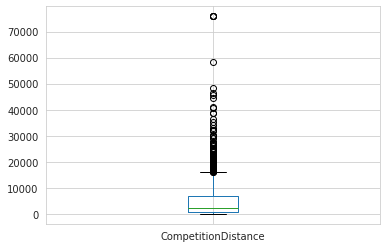

In [22]:
df1.boxplot(["CompetitionDistance"])
# df1.boxplot(["CompetitionOpenSinceMonth"])
# df1.boxplot(["CompetitionOpenSinceYear"])

In [23]:
Q1 = df1["CompetitionDistance"].quantile(0.25)
Q3 = df1["CompetitionDistance"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

6185.0


**outliers**

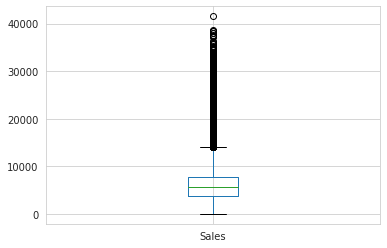

In [24]:
df0.boxplot(["Sales"])
# print(store_df[store_df.Rating>5]);

**Customers**

7388

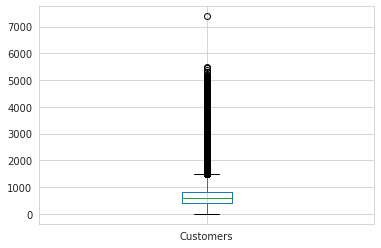

In [25]:
df0.boxplot(["Customers"])
df0.Customers.max()

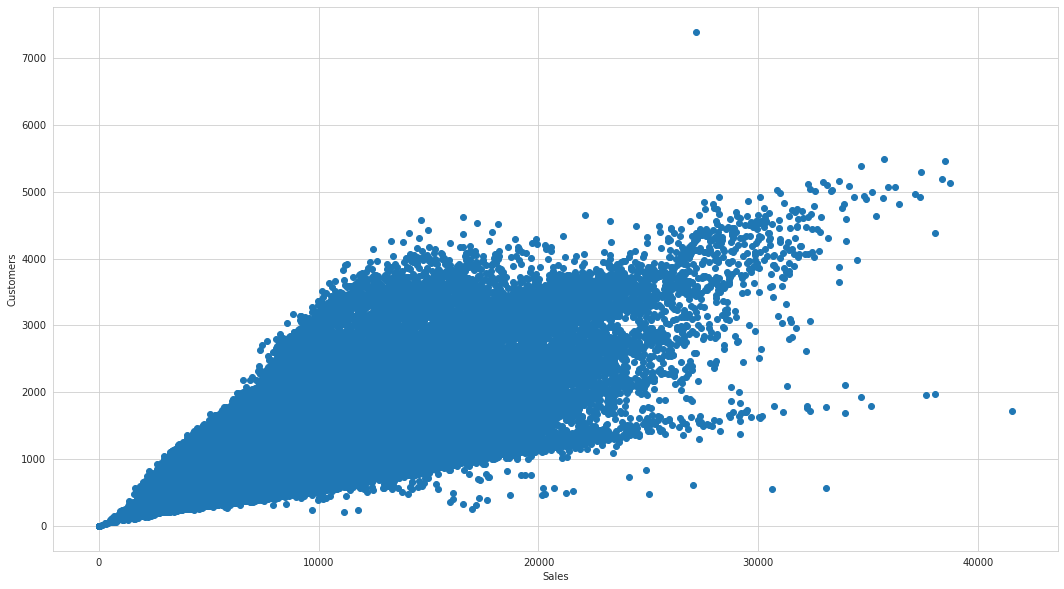

In [26]:
# Scatter plot
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(df0['Sales'], df0['Customers'])
 
# x-axis label
ax.set_xlabel('Sales')
 
# y-axis label
ax.set_ylabel('Customers')
plt.show()

In [27]:
for k, v in df0.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df0)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column Store outliers = 0.00%
Column DayOfWeek outliers = 0.00%
Column Date outliers = 0.00%
Column Sales outliers = 2.62%
Column Customers outliers = 3.75%
Column Open outliers = 100.00%
Column Promo outliers = 0.00%
Column StateHoliday outliers = 100.00%
Column SchoolHoliday outliers = 100.00%


TypeError: ignored

In [ ]:
df0["Sales"].max()

In [ ]:
df_mask=df0['Customers']>=2000

In [ ]:
filtered_df = df0[df_mask]
filtered_df

In [ ]:
df0.boxplot(["Sales"])
print(df0.Sales.min())
df0.Sales.max()

In [ ]:
df_mask=df0['Sales']>=40000

In [ ]:
filtered_df = df0[df_mask]
filtered_df

In [ ]:
df0["Sales_per_user"]=df0['Sales']/df0['Customers']

In [ ]:
df0.boxplot(["Sales_per_user"])

**Merging Data sets on store**

In [28]:
df= df0.merge(df1 , on='Store' , how='left')
# print(train.shape)
# print(store.shape)
print(df.shape)

(1017209, 16)


In [29]:
df.Sales.value_counts()

0        172871
5674        215
5558        197
5483        196
6214        195
          ...  
23806         1
24183         1
20651         1
25083         1
23303         1
Name: Sales, Length: 21734, dtype: int64

In [30]:
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Week_Number,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
0,1,5,2015-07-31,5263,555,1,1,0,1,30,c,a,1270.0,9.0,2008.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,30,a,a,570.0,11.0,2007.0,1
2,3,5,2015-07-31,8314,821,1,1,0,1,30,a,a,14130.0,12.0,2006.0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,30,c,c,620.0,9.0,2009.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,30,a,a,29910.0,4.0,2015.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,1,1,00,a,a,1900.0,6.0,2014.0,1
1017205,1112,2,2013-01-01,0,0,0,0,1,1,00,c,c,1880.0,4.0,2006.0,0
1017206,1113,2,2013-01-01,0,0,0,0,1,1,00,a,c,9260.0,9.0,2013.0,0
1017207,1114,2,2013-01-01,0,0,0,0,1,1,00,a,c,870.0,9.0,2013.0,0


#Feature Selection

**Store**

In [ ]:
store_count=df.groupby(['Store'])[['Store']].count()
# store
store_count

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


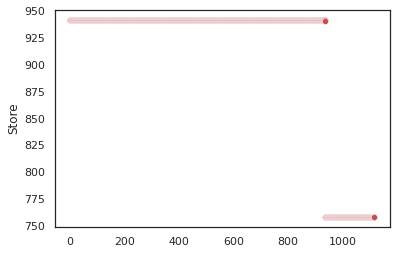

In [62]:
sns.scatterplot(df["Store"].unique(),df["Store"].value_counts(),color='r')
plt.show()

**Days of Week**

In [ ]:
#Affect on Sales due to SchoolHolidays 
# labels = 
sizes = df.DayOfWeek.value_counts()
colors = sns.color_palette('pastel')
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode,colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by Schoolholiday or Not ?")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

**Sales**(Traget Variable)

In [ ]:
df0["Sales"].plot(kind='hist',bins=100,xlim=(0,15000))
plt.show()

**Observation:-**Lots of zero sales is disturbing our Target Variable.
When stores are closed the sales value is zero hence we have deal with the zero sales.

In [ ]:
sns.barplot(x = 'Open',
            y = 'Sales',
            data = df0)
 
# Show the plot
plt.show()

**conclusion:-**When stores are closed there is no relation hence remove rows when stores are closed.

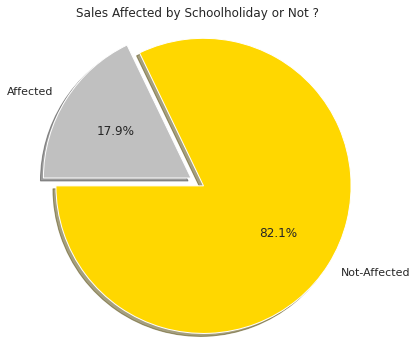

In [44]:
#Affect on Sales due to SchoolHolidays 
labels = 'Not-Affected' , 'Affected'
sizes = df0.SchoolHoliday.value_counts()
colors = ['gold', 'silver']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by Schoolholiday or Not ?")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

In [ ]:
# df=df[df.Sales !=0]
df=df[df.Open != 0]
df.shape

In [ ]:
import warnings
warnings.filterwarnings("ignore")


fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
g1 = sns.distplot(df['Sales'],hist = True,label='skewness:{:.2f}'.format(df['Sales'].skew()),ax = ax1)
g1.legend()
g1.set(xlabel = 'Sales', ylabel = 'Density', title = 'Sales Distribution')
g2 = sns.distplot(np.log1p(df['Sales']),hist = True,label='skewness:{:.2f}'.format(np.log1p(df['Sales']).skew()),ax=ax2)
g2.legend()
g2.set(xlabel = 'log(Sales+1)',ylabel = 'Density', title = 'log(Sales+1) Distribution')
plt.show()

DaysOfWeek Relation with Sales with 

In [ ]:
Sales_on_Dayofweek=df0.groupby(['DayOfWeek'])[['Sales']].sum()
Sales_on_Dayofweek

In [ ]:
df.groupby(['DayOfWeek'])[['Sales']].count()

In [ ]:
#Groupby Content Rating count the apps sort in decending order.
Sales_df = df.groupby('DayOfWeek').agg({"Sales": "sum"}).reset_index().sort_values('Sales',ascending=True)
#Select sns background,size and color.
sns.set_theme(style="whitegrid",rc={'figure.figsize':(12,6)},palette='autumn')
#plot count of content ratings on bar chart.
bars = sns.barplot(x=Content_df['DayOfWeek'],y=Sales_df.Sales,color='lightslategrey')
#set first bar to color.
bars.patches[0].set_color('#CC1313')
#Title
plt.title('Sales Amounts On Days of Week',size=15)
#Hide Grid 
plt.grid(False)
ax=plt.gca()
#X labels
plt.xlabel('Day Of Week')
plt.ylabel('')
#Hide y axis tick labels
ax.axes.yaxis.set_ticklabels([])
for spine in ax.spines.values():
  spine.set_visible(False)
#Show the counts on top of bar after iterating on each bar.
for bar in bars.patches:
  bars.annotate(format(bar.get_height(),'.0f'),(bar.get_x()+bar.get_width()/2,
                    bar.get_height()+3), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

In [ ]:
df.columns

In [ ]:
sns.factorplot(x='Sales', y='Customers', hue='Promo', data=df, kind='bar')

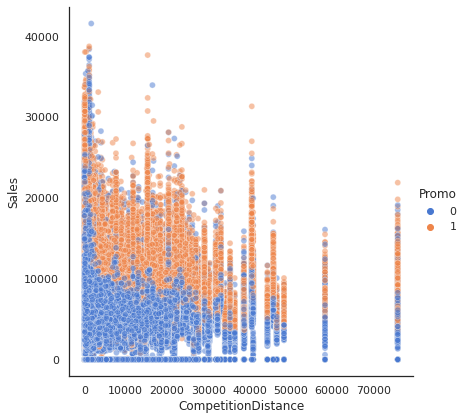

In [43]:
sns.set_theme(style="white")

# # Load the example mpg dataset
# mpg = sns.load_dataset("")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="CompetitionDistance", y="Sales", hue="Promo",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


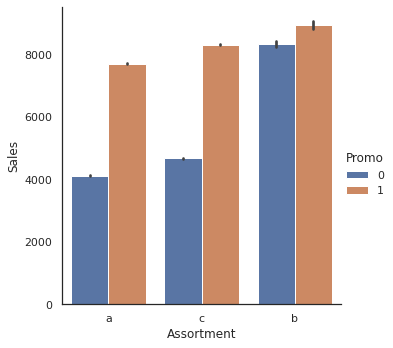

In [45]:
sns.factorplot(x='Assortment', y='Sales', hue='Promo', data=df, kind='bar')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


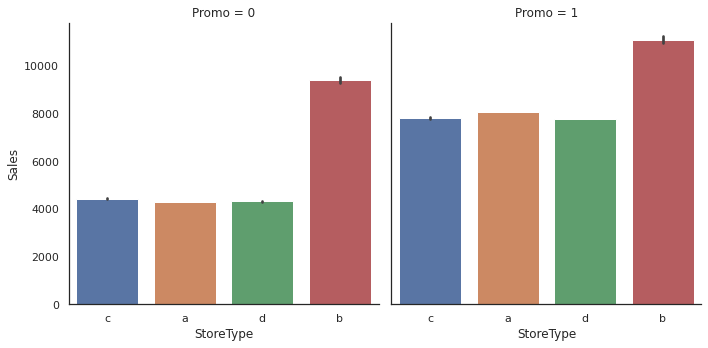

In [46]:
sns.factorplot("StoreType", "Sales", col="Promo", data=df, kind="bar")

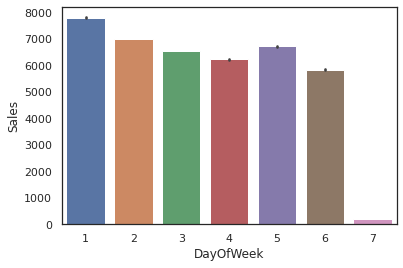

In [47]:
sns.barplot(x = 'DayOfWeek',y = 'Sales', data = df0)
 
# Show the plot
plt.show()

In [48]:
df0.DayOfWeek.value_counts()

5    145845
4    145845
3    145665
2    145664
1    144730
7    144730
6    144730
Name: DayOfWeek, dtype: int64

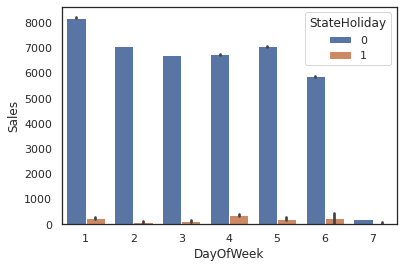

In [49]:
sns.barplot(x = 'DayOfWeek',y = 'Sales',hue="StateHoliday", data = df)
 
# Show the plot
plt.show()

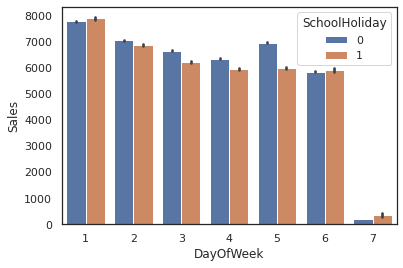

In [50]:
sns.barplot(x = 'DayOfWeek',y = 'Sales',hue="SchoolHoliday", data = df)
 
# Show the plot
plt.show()

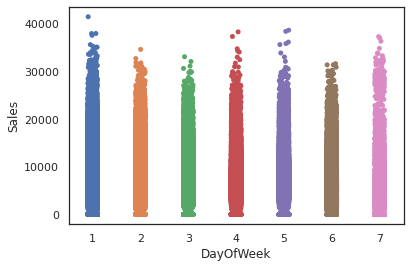

In [51]:
sns.stripplot(x="DayOfWeek", y="Sales", data=df0) 

In [52]:
Sales_on_Dayofweek=df.groupby(['DayOfWeek'])[['Sales']].sum()
Sales_on_Dayofweek

,Sales
DayOfWeek,
1,1130203012
2,1020411930
3,954962863
4,911177709
5,980555941
6,846317735
7,29551433


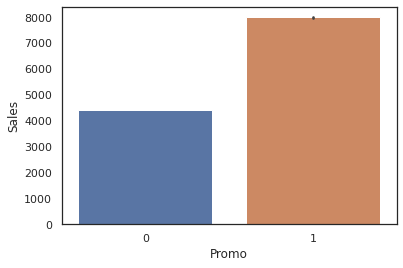

In [53]:
sns.barplot(x = 'Promo',
            y = 'Sales',
            data = df0)
 
# Show the plot
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


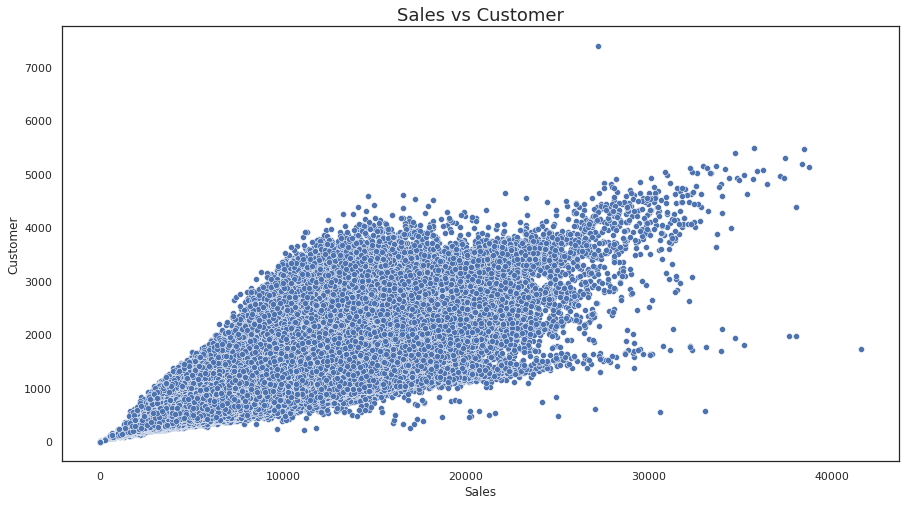

In [54]:
plt.subplots(figsize=(15,8));
sns.scatterplot(df0["Sales"],df0["Customers"],data=df0)
plt.title('Sales vs Customer',fontsize=18)
plt.grid(False)
plt.xlabel("Sales",fontsize=12)
plt.ylabel("Customer",fontsize=12)
plt.show()


In [55]:
df0.Store.unique()

array([   1,    2,    3, ..., 1113, 1114, 1115])

In [56]:
df0.corr()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Store,1.000000,-0.000008,0.005126,0.024325,-0.000047,0.000058,0.000542,0.000641
DayOfWeek,-0.000008,1.000000,-0.462125,-0.386445,-0.528963,-0.392925,-0.052889,-0.205388
Sales,0.005126,-0.462125,1.000000,0.894711,0.678472,0.452345,-0.254216,0.085124
Customers,0.024325,-0.386445,0.894711,1.000000,0.616768,0.316169,-0.226608,0.071568
Open,-0.000047,-0.528963,0.678472,0.616768,1.000000,0.295042,-0.378378,0.086171
Promo,0.000058,-0.392925,0.452345,0.316169,0.295042,1.000000,-0.012353,0.067483
StateHoliday,0.000542,-0.052889,-0.254216,-0.226608,-0.378378,-0.012353,1.000000,0.148651
SchoolHoliday,0.000641,-0.205388,0.085124,0.071568,0.086171,0.067483,0.148651,1.000000


In [ ]:
sns.barplot(x = 'StateHoliday',
            y = 'Sales',
            data = df0)
 
# Show the plot
plt.show()

In [ ]:
sns.barplot(x = 'SchoolHoliday',
            y = 'Sales',
            data = df0)
 
# Show the plot
plt.show()

In [ ]:
df0['Day'] = df0['Date'].dt.day
df0['Month'] = df0['Date'].dt.month
df0['Year'] = df0['Date'].dt.year


In [ ]:
df0['Week_Number'].sort_values()

In [ ]:
plt.rcParams['figure.figsize']=(20,5)
sns.barplot(x = df0["Week_Number"].sort_values(),
            y = "Sales",
            
            data = df0)
 

In [ ]:
plt.rcParams['figure.figsize']=(20,5)
sns.barplot(x = "Week_Number",
            y = 'Sales',
            
            data = df0)
 
# Show the plot
plt.show()

In [ ]:
df

**Create Day Month Year separate columns**

**One Hot Encoding for the storeType and Assortment**

In [ ]:
df=pd.get_dummies(df, columns = ['StoreType',	'Assortment','PromoInterval'])

In [ ]:
df


#Model Built

In [ ]:
from sklearn.model_selection import train_test_split

X = ['Customers','CompetitionDistance','Promo','Promo2','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','StateHoliday','StoreType','Assortment',
    'DayOfWeek','Week','Day','Month','Year']

X_data = df[X]
Y_data = np.log(df['Sales'])
X_train,X_test,y_train,y_test = train_test_split(X_data,Y_data,test_size=0.2,random_state=0)

In [ ]:
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import make_scorer,mean_squared_error 


def plot_importance(model):
    k = list(zip(X,model.feature_importances_))
    k.sort(key=lambda tup: tup[1])
    
    labels, vals = zip(*k)
    
    plt.barh(np.arange(len(X)),vals,align = 'center')
    plt.yticks(np.arange(len(X)),labels)